### Assignment 1 : Reinforcement Learning Programming - CSCN8020

### Problem 1
***Pick-and-Place Robot***: Consider using reinforcement learning to control the motion of a robot arm
in a repetitive pick-and-place task. If we want to learn movements that are fast and smooth, the
learning agent will have to control the motors directly and obtain feedback about the current positions
and velocities of the mechanical linkages.
Design the reinforcement learning problem as an MDP, define states, actions, rewards with reasoning.

##### States

1. **Initialize** <br>
- For the robotic arm, when it is powered on, It should validate if all the joints for movement and griper to hold the object are working properly. 
- It should also validate surrounding environment if there is any obstacles are available or not. If there is any object, it should calibrate the configuration that does not damage the arm during the movement

2. **Display Warning** <br>
- During the initialization, if any issue is found in configuration or calibration, It should display warning the operator / monitoring system / monitoring authority.

3. **Ready**<br>
- When robot has passed all initialization steps successfully and ready to perform its tasks. 
- Identify where gripper of robotic arm is located currently.
- Check if gripper already hold object or not

4. **Scan for object**<br>
- Scan for the object to pick up
- If more than one object is found, Choose closest one
- Once object is selected, validate its dimension if it can be fixed in gripper.

5. **Pick object**<br>
- Calculate distance from current arm position to object 
- Create movement strategy to move the arm towards the object
- Pick the object 

6. **Drop Object**
- 

8. **Display Error**
- In failure of performing any actions, display error



### Problem 2

**2x2 Gridworld**
Consider a 2x2 gridworld with the following characteristics:
<br>
<br>
**State Space (S)**: s1, s2, s3, s4.
<br>

**Action Space (A)**: up, down, left, right.

**Initial Policy (π):** 
For all states, π(up|s) = 1.

**Transition Probabilities P(s′|s, a):**
- If the action is valid (does not run into a wall), the transition is deterministic.
- Otherwise, s′ = s.

**Rewards R(s):**
- R(s1) = 5 for all actions a.
- R(s2) = 10 for all actions a.
- R(s3) = 1 for all actions a.
- R(s4) = 2 for all actions a.
<br>
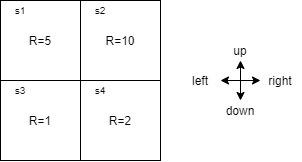

##### Considerations

1. **Discount Factor (γ)**: Assume γ = 1
2. **Initialize** value function with **0** for all states
<br/>
V(S<sub>1</sub>) = V(S<sub>2</sub>) = V(S<sub>3</sub>) = V(S<sub>4</sub>) = 0

3. For all states, **π(up|s) = 1** means that agent always takes the **up** action
4. We will be using **Bellmen's Equation** to calculate value function updates
<br/>
$$
V^*(s) = \max_a \sum_{s'} P(s' | s, a) \left[ R(s, a, s') + \gamma V^*(s') \right]
$$

##### Initial State
As considered, in initial state, value function for all state is 0

V(S<sub>1</sub>) = V(S<sub>2</sub>) = V(S<sub>3</sub>) = V(S<sub>4</sub>) = 0

- As, all actions in initial policy is **up**, ( 𝜋(up∣𝑠)=1 ), In iteration 1, Update the value function considering action **up**
##### Iteration 1

- Using the Bellman equation for each state, we compute the new value function for each state

V<sub>1</sub>(S<sub>1</sub>) = R(S<sub>1</sub>) + γV<sub>0</sub>(S<sub>1</sub>) <br/>
= 5 + (1 × V<sub>0</sub>(S<sub>1</sub>))<br/>
​= 5 + 0<br/>
= 5<br/>

V<sub>1</sub>(S<sub>2</sub>)  = R(S<sub>2</sub>) + γV<sub>0</sub>(S<sub>2</sub>)<br/>
= 10 + (1 × V<sub>0</sub>(S<sub>2</sub>))<br/>
​= 10 + 0<br/>
= 10<br/>

V<sub>1</sub>(S<sub>3</sub>)  = R(S<sub>3</sub>) + γV<sub>0</sub>(S<sub>3</sub>)<br/>
= 1 + (1 × V<sub>0</sub>(S<sub>3</sub>))<br/>
​= 1 + 0<br/>
= 1<br/>

V<sub>1</sub>(S<sub>4</sub>)  = R(S<sub>4</sub>) + γV<sub>0</sub>(S<sub>4</sub>)<br/>
= 2 + (1 × V<sub>0</sub>(S<sub>4</sub>))<br/>
​= 2 + 0<br/>
= 2<br/>

##### Iteration 2

V<sub>2</sub>(S<sub>1</sub>) = R(S<sub>1</sub>) + γV<sub>1</sub>(S<sub>1</sub>)<br/>
= 5 + (1 × V<sub>1</sub>(S<sub>1</sub>))<br/>
​= 5 + 5<br/>
= 10<br/>

V<sub>2</sub>(S<sub>2</sub>) = R(S<sub>2</sub>) + γV<sub>1</sub>(S<sub>2</sub>)<br/>
= 10 + (1 × V<sub>1</sub>(S<sub>2</sub>))<br/>
​= 10 + 10<br/>
= 20<br/>

V<sub>2</sub>(S<sub>3</sub>) = R(S<sub>3</sub>) + γV<sub>1</sub>(S<sub>3</sub>) <br/>
= 1 + (1 × V<sub>1</sub>(S<sub>3</sub>))<br/>
​= 1 + 5<br/>
= 6<br/>

V<sub>2</sub>(S<sub>4</sub>) = R(S<sub>4</sub>) + γV<sub>1</sub>(S<sub>4</sub>) <br/>
= 2 + (1 × V<sub>1</sub>(S<sub>4</sub>))<br/>
​= 2 + 10<br/>
= 12<br/>

##### Iterations Summary


| Iteration | Action | (S₁) Transition | (S₁) Value Function | (S₂) Transition | (S₂) Value Function | (S₃) Transition | (S₃) Value Function | (S₄) Transition | (S₄) Value Function |
|-----------|--------|----------------|----------------------|----------------|----------------------|----------------|----------------------|----------------|----------------------|
| **0** (initial)    | -      | -              | V<sub>0</sub>(S<sub>1</sub>) = **0**                | -              |V<sub>0</sub>(S<sub>2</sub>) = **0**                | -              | V<sub>0</sub>(S<sub>3</sub>) = **0**                | -              | V<sub>0</sub>(S<sub>4</sub>) = **0**                |
| **1**     | Up     | S₁ → S₁        | V<sub>1</sub>(S<sub>1</sub>) = **5**                | S₂ → S₂        |V<sub>1</sub>(S<sub>2</sub>) = **10**               | S₃ → S₁        | V<sub>1</sub>(S<sub>3</sub>) = **1**                | S₄ → S₂        |  V<sub>1</sub>(S<sub>4</sub>) = **2**               |
| **2**     | Up     | S₁ → S₁        | V<sub>2</sub>(S<sub>1</sub>) = **10**               | S₂ → S₂        |V<sub>2</sub>(S<sub>2</sub>) =  **20**               | S₃ → S₁        | V<sub>2</sub>(S<sub>3</sub>) = **6**               | S₄ → S₂        |  V<sub>2</sub>(S<sub>4</sub>) = **12**               |



- Value is increased with each iteration but agent is not yet convergent towards the optimal values in 2 iterations, so, at this stage, policy improvement should not be done.

### Problem 3

**5x5 Gridworld**<br/>

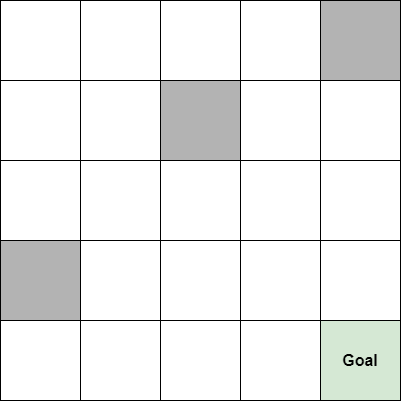

**States**: 
states are identified by their row and column, the same as a regular matrix. Ex: the state in row 0 and column 3 is s0,3
- **Terminal/Goal state**: The episode ends if the agent reached this state. sGoal = s4,4
- **Grey states**: {s2,2, s3,0, s0,4}, these are valid but non-favourable states, as will be seen in the reward function.
- **Actions**: a1 = right, a2 = down, a3 = down, a4 = up for all states.
- **Transitions**: If an action is valid, the transition is deterministic, otherwise s′ = s
- **Rewards R(s)**:
R(s) 
= +10 , s = s4,4
= −5  , s ∈ Sgrey = s2,2, s3,0, s0,4
= −1  , s ∈ S ̸= s4,4, Sgrey

##### Update the reward function to be a list of reward based on whether the state is terminal, grey, or a regular state.

In [1]:
from temp.value_iteration import GridWorld
ENV_SIZE = 5
gridworld = GridWorld(ENV_SIZE)

# Validate reward function
print("Reward for state (2,2):", gridworld.get_reward(2,2))  # Should print -5
print("Reward for state (4,4):", gridworld.get_reward(4,4))  # Should print 10
print("Reward for state (0,0):", gridworld.get_reward(0,0))  # Should print -1


Reward for state (2,2): -5
Reward for state (4,4): 10
Reward for state (0,0): -1


##### Run the existing code developed in class and obtain the optimal state-values and optimal policy. Provide a figures of the gridworld with the obtained V∗ and π∗

In [2]:
gridworld.value_iteration()

# Get the optimal value function
print("Optimal Value Function:\n", gridworld.get_value_function())


Converged after 8 iterations.
Optimal Value Function:
 [[ 3.  4.  5.  6.  7.]
 [ 4.  5.  6.  7.  8.]
 [ 5.  6.  7.  8.  9.]
 [ 6.  7.  8.  9. 10.]
 [ 7.  8.  9. 10.  0.]]


In [3]:
# Get the optimal value policy
gridworld.print_policy()

 →   →   →   ↓   ↓  
 →   →   →   →   ↓  
 →   ↓   →   →   ↓  
 →   →   →   →   ↓  
 →   →   →   →   T  
